<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/1002_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_8%EC%9E%A5_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**10/2(월) 과제 - 파이썬 머신러닝 완벽 가이드 ch8.1 ~ 3 pg. 466 ~ 486 필사**

---


# **ch8. 텍스트 분석**

1. NLP : 머신이 인간의 언어를 이해하고 해석하는 데 더 중점
2. 텍스트 마이닝 : 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀더 중점

    => 머신러닝, 언어이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 분석 작업을 주로 수행함

* 텍스트 분류 : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법 통칭
* 감성 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법 총칭
* 텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법. 대표적으로 토픽 모델링
* 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법. 텍스트 분류를 비지도학습으로 수행하는 방법의 일환으로 사용 가능


## **01. 텍스트 분석 이해**
[텍스트 분석 수행 프로세스]

1. 텍스트 사전 준비작업(텍스트 전처리) : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미 없는 단어(Stop word) 제거 작업, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업을 수행하는 것 통칭한다.

2. 피처 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값 할당. 대표적으로 BOW와 Word2Vec. BOW는 대표적으로 Count 기반과 TF-IDF 기반 벡터화가 있다.

3. ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가 수행한다.

[파이썬 기반의 NLP, 텍스트 분석 패키지]
* NLTK  : 파이썬의 가장 대표적인 NLP 패키지
* Gensim : 토픽 모델링 분야에서 가장 두각을 나타내는 패키지
* SpaCy : 뛰어난 수행 성능으로 최근 가장 주목을 받는 NLP 패키지

## **02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화**

텍스트 정규화 : 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것

* 클렌징 : 텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업
* 토큰화 : 토큰화의 유형은 문서에서 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화로 나눌 수 있음
* 필터링/스톱 워드 제거/철자 수정
* Stemming
* Lemmatization

* 문장 토큰화 : 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것. 정규 표현식에 따른 문자 토큰화도 가능

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample='The Matrix is everywhere its all around us, here even in ths room. You can see it out your window or on your television. You feel it when you go to work, or go to church or pay your taxes.'
sentences=sent_tokenize(text=text_sample)
print(type(sentences), len(sentences)) #list
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in ths room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


* 단어 토큰화 : 문장을 단어로 토큰화하는 것. 기본적으로 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어 분리. 정규 표현식 이용도 가능

In [2]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성

def tokenize_text(text):

  #문장별로 분리 토큰
  sentences = sent_tokenize(text)
  #분리된 문장별 단어 토큰화
  word_tokens=[word_tokenize(sentence) for sentence in sentences]
  return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'ths', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


=> 문장을 단어별로 하나씩 토큰화 하면 문맥적인 의미는 무시될 수 있음

=> 이를 해결하기 위해 n-gram 도입할 수 있으며, n-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것

[스톱 워드 제거]

* 스톱 워드(Stop word) : 분석에 큰 의미가 없는 단어 지칭

    => 예를 들어 문장을 구성하는 필수 문법 요소는 빈번하게 나타나기 때문에 오히려 중요한 단어로 인지된다. 따라서 제거해야함

* NTLK의 스톱 워드 -> NLTK의 stopwords 목록

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
# stopwords를 필터링으로 제거해 분석을 위한 의미 있는 단어만 추출
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'ths', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


=> is, this가 제거됨

[Stemming과 Lemmatization]

Stemming과 Lemmatization : 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것.

* 두 기능 모두 원형 단어를 찾는다는 목적은 유사하지만, Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾는다

    * Stemming은 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출한다.

    * Lemmatization은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어 찾음. 따라서 변환에 더 오랜 시간 필요

In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


=> amuse, fancy의 경우 잘 안됨

In [8]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused','v')) #동사 ->v
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a')) #형용사 -> a
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('happest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy happest


=> stemmer 보다 정확하게 원형 단어 추출 가능

## **03. Bag of Words-BOW**

Bag of Words-BOW : 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

**예시)**

문장1: 'My wife likes to watch baseball games and my daughter likes to watch baseball games too'

문장2: 'My wife likes to play baseball'

1. 문장에 있는 모든 단어에서 중복 제거 하고, 각 단어를 칼럼 형태로 나열한다, 그 다음 각 단어에 고유의 인덱스 부여한다.

2. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어(단어 인덱스)에 기재

<장점>

* 쉽고 빠른 구축
* 높은 활용도

<단점>

* 문맥 의미 반영 부족 : BOW는 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시

* 희소 행렬 문제 : Bow로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 셑트가 만들어지기 쉬움. 많은 문서에서 단어의 개수는 수만개가 될텐데 하나의 문서에 있는 단어는 극히 일부분이므로 대부분 데이터가 0으로 채워짐 -> 희소 행렬 . 이는 알고리즘의 수행시간과 예측 성능을 떨어트림

[Bow 피처 벡터화]

피처 벡터화 : 텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환

* BOW 모델에서 피처 벡터화 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것이다.

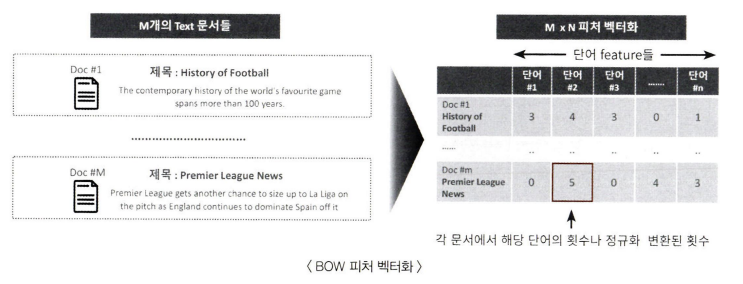



BOW의 피처벡터화는 두가지방식이 있다.

1. 카운트 벡터화 : 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우

2. TF-IDF 벡터화 : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 가되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값 부여

[사이킷런의 count 및 tf-idf 벡터화 구현 : countvectorizer, tfidfvectorizer]

1. 사이킷런의 CountVectorizer클래스

CountVectorizer클래스 : 카운트 기반의 벡터화 구현한 클래스

=> 피처 벡터화 + 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행

<파라미터>
* max_df : 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처 제외
* min_df : 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처 제외
* max_features : 추출하는 피처의 개수 제한
* stop_words : english로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외
* n_gram_range : BOW 모델의 단어 순서를 어느 정도 보강하기 위한 n_gram 범위 설정
* analyzer : 피처 추출을 수행한 단위 지정
* token_pattern : 토큰화를 수행하는 정규 표현식 패턴 지정
* tokenizer : 토큰화를 별도의 커스텀 함수로 이용시 적용


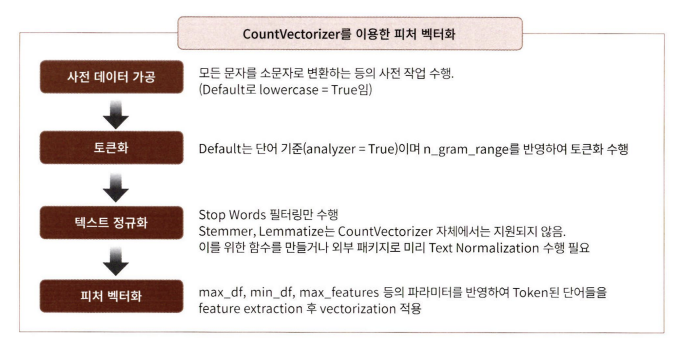

2. 사이킷런에서 TfidfVectorizer클래스

-> 파라미터, 변환 방법은 동일

[BOW 벡터화를 위한 희소 행렬]

* 사이킷런의 CountVectorizer/TfidfVectorizer를 이용해 텍스트를 피처 단위로 벡터화해 변환하고 CSR 형태의 희소 행렬을 반환
* 모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하는 방법은 필연적으로 많은 피처 칼럼 만들 수 밖에 없음
* 대규모 행렬의 대부분의 값을 0이 차지하는 행렬이 희소 행렬

    => 적은 메모리를 차지할 수 있도록 변환

* 대표적인 방법 => COO 형식, CSR 형식

1. 희소 행렬 - COO 형식
* COO(Coordinate : 좌표)형식 : 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [9]:
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

In [10]:
from scipy import sparse

#0이 아닌 데이터 추출
data = np.array([3,1,2])

#행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

#sparse 패키지의 coo_matrix 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [11]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

2. 희소 행렬 - CSR 형식

* CSR(Compressed Sparse Row) : COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [12]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

#0이 아닌 데이터 추출
data2=np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

#행 위치와 열 위치를 각각 array로 생성
row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

#COO 형식으로 변환
sparse_coo=sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성 + 맨 끝에는 총 데이터 수
row_pos_ind=np.array([0,2,7,9,10,12,13])

#CSR 형식으로 변환
sparse_csr=sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [13]:
#밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성
dense3=np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

coo=sparse.coo_matrix(dense3)
csr=sparse.csr_matrix(dense3)